# Gordon L


# Lab 11: Understanding the data. 

Last 2 classes we have been working on understanding data. In this lab you will apply that.


**Context**
The goal of this lab is to understand a large dataset of 27901 rows and 18 columns Perform Exploratory Data Analysis (EDA) on the data. Look at how the data effects the end result **depression** (yes/no)

- Load and get a basic understanding of the dataset
- Clean up the data 
    - examples:
        - check and fix any missing data 
        - use both Hot and integer encoding
        - convert any numeric data from strings to ints
- Perform Exploratory Data Analysis (EDA) 
    - I will leave it to you to understand and explore this. 
        - Histplot
        - Countplot
        - Correlation
        - Heatmaps
        - boxplots
        - have fun

Make sure to communicate to me along the way. I want your to tell me what your assumptions are what your learning about the data and what you learned with EDA.  There are 18 data points for each student I expect an perform EDA on most of those points like what we did in class with MPG. (remember how we did a sns.pairplot(df[[ "cylinders", "mpg","model_year"]]) and sns.pairplot(df[["mpg", "horsepower", "weight", "displacement"]]) and others. ) 

remember to have fun with this 

----------------------------------------------------------------------------------------------------------------------------------------------

From: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset/data


Field Descriptions

**id** - A unique identifier assigned to each student record in the dataset.

**Gender** - The gender of the student (e.g., Male, Female, Other). This helps in analyzing gender-specific trends in mental health.

**Age** - The age of the student in years.

**City** - The city or region where the student resides, providing geographical context for the analysis.

**Profession** - The field of work or study of the student, which may offer insights into occupational or academic stress factors.

**Academic Pressure** - A measure indicating the level of pressure the student faces in academic settings. This could include stress from exams, assignments, and overall academic expectations.

**Work Pressure** - A measure of the pressure related to work or job responsibilities, relevant for students who are employed alongside their studies.

**CGPA** - The cumulative grade point average of the student, reflecting overall academic performance.

**Study Satisfaction** - An indicator of how satisfied the student is with their studies, which can correlate with mental well-being.

**Job Satisfaction** - A measure of the student’s satisfaction with their job or work environment, if applicable.

**Sleep Duration** - The average number of hours the student sleeps per day, which is an important factor in mental health.

**Dietary Habits** - An assessment of the student’s eating patterns and nutritional habits, potentially impacting overall health and mood.

**Degree** - The academic degree or program that the student is pursuing.

**Have you ever had suicidal thoughts ?** - A binary indicator (Yes/No) that reflects whether the student has ever experienced suicidal ideation.

**Work/Study Hours** - The average number of hours per day the student dedicates to work or study, which can influence stress levels.

**Financial Stress** - A measure of the stress experienced due to financial concerns, which may affect mental health.

**Family History of Mental Illness** - Indicates whether there is a family history of mental illness (Yes/No), which can be a significant factor in mental health predispositions.

**Depression** - The target variable that indicates whether the student is experiencing depression (Yes/No).

------------------------------------------------------------------------------------------------------------------------------------------------

*Provided for reference only*
``` python 
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

#move the dowload to the current directory
shutil.move(path, "./Lab_11_dataset")
````

In [1]:
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

#move the dowload to the current directory
shutil.move(path, "./Lab_11_dataset")

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 456k/456k [00:00<00:00, 1.44MB/s]

Extracting files...


'./Lab_11_dataset'

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# loading the dataset
df = pd.read_csv("./Lab_11_dataset/student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


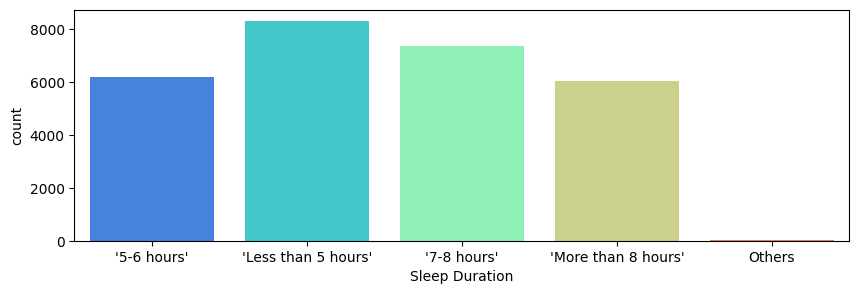

In [ ]:
# graph of students sleep trend, code copied from class notes
plt.figure(figsize = (10, 3))
sns.countplot(x = df["Sleep Duration"], data = df, palette = "rainbow", hue = "Sleep Duration",legend=False)
plt.show()


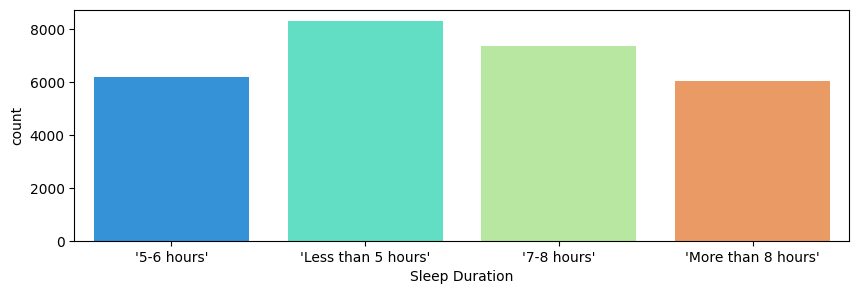

In [ ]:
# remving others bc its not pretty with the graph, exaple of cleaning data
df = df[df["Sleep Duration"] != "Others"]
plt.figure(figsize = (10, 3))
sns.countplot(x = df["Sleep Duration"], data = df, palette = "rainbow", hue = "Sleep Duration",legend=False)
plt.show()


## learnings 
we see that student are not sleep much with less than 5 hours being common. 
Lets investgate this further. Factors such as Work/Study Hours or Financial Stress. 




Possible factors to consider:
id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression



### Change of plans
After looking at the data im going to challenge myself to draw a conclusion for what factors are the worst for students mentally, statistacally in the time I have. Emotions are not accounted for. 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# loading the dataset
df = pd.read_csv("./Lab_11_dataset/student_depression_dataset.csv")
df.head() 

#reloading dataset 



,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


Things to consdier when imlooking at the data as a fellow student. 

- Work load, financial stress, and family history of mental illness are all things that can be hard to talk about.
- The data is not perfect. It is a survey and people are not always honest.
- Sleep and diet, could be intreresting to look at. 

<Axes: xlabel='Depression', ylabel='Age'>

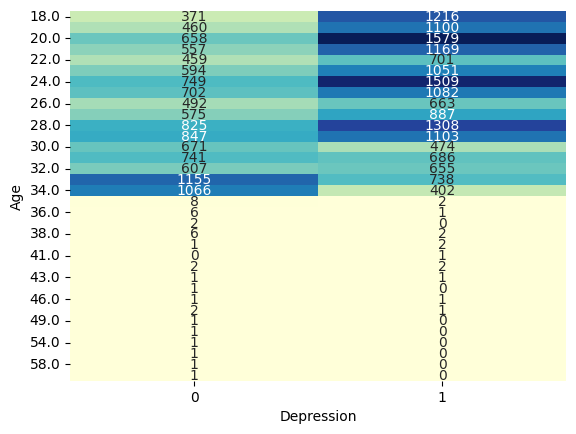

In [3]:
# grouping ages with result of depression
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
ageDep = df.groupby(["Age", "Depression"]).size().reset_index(name="Count")

# cool combo 
df_pivot = ageDep.pivot(index="Age", columns="Depression", values="Count").fillna(0)
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar=False)




C:\Users\gum12\AppData\Local\Temp\ipykernel_14640\1750410509.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageDep = ageDep.groupby(["Age", "Depression"], as_index=False)["Count"].sum()


<Axes: xlabel='Depression', ylabel='Age'>

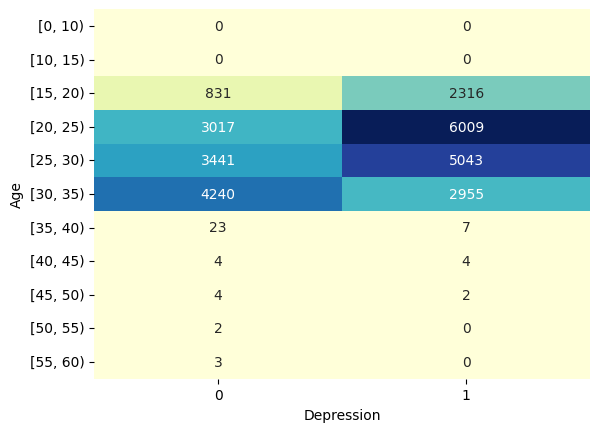

In [4]:
# impored the data by grouping ages with result of depression
ageDep = df.groupby(["Age", "Depression"]).size().reset_index(name="Count")
ageDep["Age"] = pd.cut(ageDep["Age"], bins=[0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], right=False)

# error caused the data now being multiple sets and need to be added together per grouping
ageDep = ageDep.groupby(["Age", "Depression"], as_index=False)["Count"].sum()

# pivot the data
df_pivot = ageDep.pivot(index="Age", columns="Depression", values="Count").fillna(0)
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar=False)




## takeaways 
- data is not including k-12.
- the 20 - 30 have alot more people with depression. 
- 45+ will be most likely removed since they can barely be considered a sample due to the low number of people. 
  - though they might be the highest due to domestic abuse from loved one or caretakers this dataset cant justify it.


### side side goal
maybe for fun, i can run it make it into a neural network and see if it can predict depression. :>


C:\Users\gum12\AppData\Local\Temp\ipykernel_14640\1888574578.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageDep = ageDep.groupby(["Age", "Depression"], as_index=False)["Count"].sum()


<Axes: xlabel='Depression', ylabel='Age'>

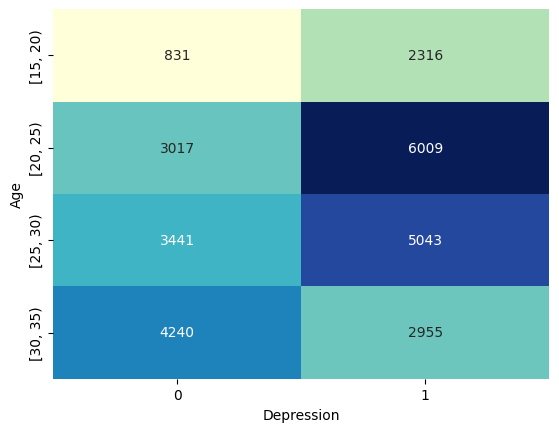

In [7]:
# impored the data by grouping ages with result of depression
ageDep = df.groupby(["Age", "Depression"]).size().reset_index(name="Count")
ageDep["Age"] = pd.cut(ageDep["Age"], bins=[15, 20, 25, 30, 35,], right=False)

# error caused the data now being multiple sets and need to be added together per grouping
ageDep = ageDep.groupby(["Age", "Depression"], as_index=False)["Count"].sum()

# pivot the data
df_pivot = ageDep.pivot(index="Age", columns="Depression", values="Count").fillna(0)
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar=False)




## yay 
now its pretty and filtered to a workable dataset that i want to work with. 
- used pd to filter and manipulate the data.
- used seaform to make it pretty.

## next step 
time to actually look at the factors that are contrubuting to depression.

# NEW STEP RELEASE DURING LAB 
TLDR: Make a model predict depression. 